___


# <font color= #8A0829> Proyecto Taller de Modelado de Datos </font>
- <Strong> `Isaac Vazquez Sandoval` </Strong>
- <Strong> Año </Strong>: 2025
- <Strong> Email: </Strong>  <font color="blue"> `isaac.vazqsand@gmail.com` </font>
___




### OBJETIVO: 

El objetivo del proyecto es evaluar el conocimiento adquirido sobre la preparación de datos y construcción de modelos predictivos tanto para problemas de regresión como de clasificación.  Se busca abordar la construcción de los modelos, fundamentar por medio de la comunicación de resultados, evaluación de las predicciones del modelo y la metodología establecida para la preparación de los datos. 

## Entregables:

El proyecto se dividirá en 3 entregables:

### Engrega 1 (Limpieza y anális exploratorio):


#### Regresión

1. **Visualización, exploración, preparación y análisis de datos:** 
- Extracción de información estadística básica en los datos analizados.
- En esta fase las características de las bases de datos deben ser mencionadas (datos nulos, datos sesgados, datos atípicos, distribución de datos, etc.)
- Limpieza de datos
- En esta fase de debe mencionar y mostrar el proceso y decisiones tomadas para procesar y limpiar estos datos. 
- Se deben incluir gráficos interesantes que muestren el comportamiento de los datos y cómo se relacionan, así como acompañar los gráficos con una explicación de lo que se observa en el gráfico.
- Después de haber hecho el análisis de tus datos, puedes irte dando una idea de cuál modelo es el mejor para tu dataset. 
- Explica dadas las caracterícas que observaste sobre los datos que tienes, cuál sería el mejor modelo a aplicar en tu dataset. 


### 1.0 Acerca del Dataset

#### 1.0.1 Origen:

https://www.kaggle.com/datasets/fedesoriano/stellar-classification-dataset-sdss17


#### 1.0.2 Problema a resolver

Este dataset consiste de 100,000 observaciones espaciales por parte del   "SDSS"(Un proyecto del estudio del espacio). Este dataset esta principalmente construido para clasificacion de estrellas, galaxias y quazares dependiendo sus carateristicas, sin embargo nuestro objetivo sera hacer un **analisis de regresion de la variable "redshift"** la cual significa en palabras sencillas: "la longitud de onda de la luz que registramos de los cuerpos celestes", esto es importante porque nos permite saber la distancia y velocidad en la que se acercan o alejan objetos celestes relativos a la tierra, lo cual en ultima instancia nos permite crear mapas de universo para comprender su historia y evolucion. 

#### 1.0.3 Variables del Dataset

- obj_ID = Identificador de Objeto, el valor único que identifica al objeto en el catálogo de imágenes usado por el CAS.

- alpha = Ángulo de Ascensión Recta (en la época J2000).

- delta = Ángulo de Declinación (en la época J2000).

- u = Filtro ultravioleta en el sistema fotométrico.

- g = Filtro verde en el sistema fotométrico.

- r = Filtro rojo en el sistema fotométrico.

- i = Filtro infrarrojo cercano en el sistema fotométrico.

- z = Filtro infrarrojo en el sistema fotométrico.

- run_ID = Número de Corrida (Run Number), usado para identificar el barrido (scan) específico.

- rereun_ID = Número de Reprocesamiento (Rerun Number), para especificar cómo fue procesada la imagen.

- cam_col = Columna de la cámara, para identificar la línea de barrido (scanline) dentro de la corrida.

- field_ID = Número de campo, para identificar cada campo.

- spec_obj_ID = ID único usado para objetos espectroscópicos ópticos (esto significa que 2 observaciones diferentes con el mismo spec_obj_ID deben compartir la clase de salida).

- class = Clase de objeto (objeto galaxia, estrella o cuásar).

- **redshift = Valor de desplazamiento al rojo (redshift), basado en el incremento de la longitud de onda.**

- plate = ID de placa, identifica cada placa en SDSS.

- MJD = Fecha Juliana Modificada, usada para indicar cuándo fue tomado un dato específico de SDSS.

- fiber_ID = ID de fibra, que identifica la fibra que apuntó la luz al plano focal en cada observación.

### 1.1 Importación de Librerías y Carga de Datos 

In [156]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

- ***pandas*** es necesario para cargar el dataset
- ***numpy*** es necesario para realizar calculos con los datos
- ***matplotlib.pyplot*** y ***seaborn*** son necesesarios para visualizar los datos
- ***train_test_split*** es necesesario para separar datos de entrenamiento y prueba
- ***StandardScaler*** es para escalar los datos

In [157]:
df=pd.read_csv('data/regression/redshift.csv')

- Cargamos los datos a partir de un .csv

### 1.2 Análisis Exploratorio de los Datos

#### 1.2.1 Extracción de Datos Estadísticos

In [158]:
print("Primeras 5 filas del DataFrame:")
df.head(5)

Primeras 5 filas del DataFrame:


,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


In [159]:
rows, cols = df.shape
print(f'El dataset tiene {rows} filas y {cols} columnas.')

El dataset tiene 100000 filas y 18 columnas.


- Podemos observar 18 propiedades, por pura intuicion podemos entender que todas las que tiene el sufijo: '_ID' no son para nada utiles en el analisis de regresion, ya que son solo etiquetas, seria como intentar predecir el salario de alguien con su numero de seguro social.

In [160]:
print("\nDescripción estadística del dataset:")
df.describe()


Descripción estadística del dataset:


,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.0,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.237665e+18,177.629117,24.135305,21.980468,20.531387,19.645762,19.084854,18.668810,4481.366060,301.0,3.511610,186.130520,5.783882e+18,0.576661,5137.009660,55588.647500,449.312740
std,8.438560e+12,96.502241,19.644665,31.769291,31.750292,1.854760,1.757895,31.728152,1964.764593,0.0,1.586912,149.011073,3.324016e+18,0.730707,2952.303351,1808.484233,272.498404
min,1.237646e+18,0.005528,-18.785328,-9999.000000,-9999.000000,9.822070,9.469903,-9999.000000,109.000000,301.0,1.000000,11.000000,2.995191e+17,-0.009971,266.000000,51608.000000,1.000000
25%,1.237659e+18,127.518222,5.146771,20.352353,18.965230,18.135828,17.732285,17.460677,3187.000000,301.0,2.000000,82.000000,2.844138e+18,0.054517,2526.000000,54234.000000,221.000000
50%,1.237663e+18,180.900700,23.645922,22.179135,21.099835,20.125290,19.405145,19.004595,4188.000000,301.0,4.000000,146.000000,5.614883e+18,0.424173,4987.000000,55868.500000,433.000000
75%,1.237668e+18,233.895005,39.901550,23.687440,22.123767,21.044785,20.396495,19.921120,5326.000000,301.0,5.000000,241.000000,8.332144e+18,0.704154,7400.250000,56777.000000,645.000000
max,1.237681e+18,359.999810,83.000519,32.781390,31.602240,29.571860,32.141470,29.383740,8162.000000,301.0,6.000000,989.000000,1.412694e+19,7.011245,12547.000000,58932.000000,1000.000000


In [161]:
print("\nInformación del DataFrame:\n")
print(df.info())


Información del DataFrame:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
d

- Como podemos observar, todas nuestras variables son numericas a excepcion de "class"(tipo de galaxia), por lo que seria bueno hacer encoding, para que todos nuestros datos sean numericos

In [162]:
unique_counts = df.nunique()
print("Número de valores únicos por columna:\n")
print(unique_counts)

Número de valores únicos por columna:

obj_ID          78053
alpha           99999
delta           99999
u               93748
g               92651
r               91901
i               92019
z               92007
run_ID            430
rerun_ID            1
cam_col             6
field_ID          856
spec_obj_ID    100000
class               3
redshift        99295
plate            6284
MJD              2180
fiber_ID         1000
dtype: int64


- Vemos que la columnna "rerun_ID" tienen un solo valor, segun mi entendimiento esta variable se trata del tipo de procesamiento de imagen, por lo que podemos inferir que solo se uso un tipo de procesamiento. No tiene ningun valor para nuestro analisis de regresion.

- Tambien esta "cam_col" la cual es informacion tecnica de la camara(que tiene 6 columnas), no esta relacionada para nada con redshift.

In [163]:
print("Datos Nulos: ")
print(df.isnull().sum())

Datos Nulos: 
obj_ID         0
alpha          0
delta          0
u              0
g              0
r              0
i              0
z              0
run_ID         0
rerun_ID       0
cam_col        0
field_ID       0
spec_obj_ID    0
class          0
redshift       0
plate          0
MJD            0
fiber_ID       0
dtype: int64


- No tenemos ningun valor nulo, esto simplifica nuestra limpieza de datos

Analisis de Sesgo:
obj_ID           0.399
alpha           -0.029
delta            0.175
u             -313.849
g             -314.277
r               -0.508
i               -0.404
z             -314.759
run_ID           0.399
rerun_ID         0.000
cam_col         -0.031
field_ID         1.753
spec_obj_ID      0.198
redshift         2.524
plate            0.198
MJD             -0.382
fiber_ID         0.230
dtype: float64


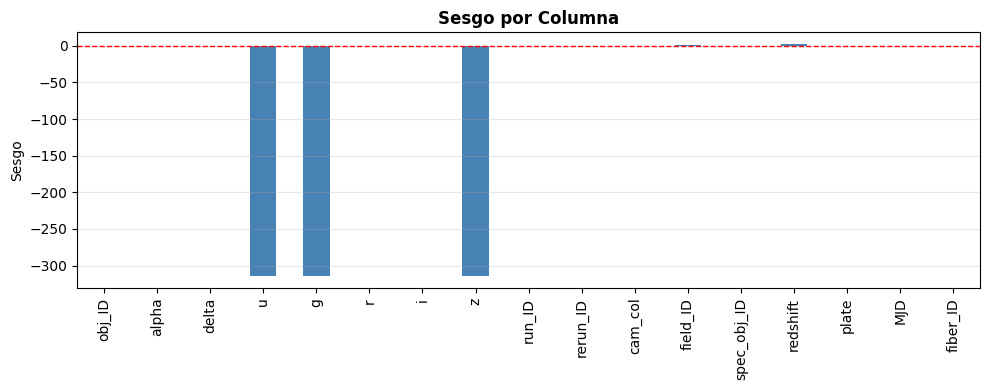

In [164]:

print("Analisis de Sesgo:")
skewness = df.select_dtypes(include=[np.number]).skew().round(3)
print(skewness)

skewness.plot(kind='bar', figsize=(10, 4), color='steelblue')
plt.title('Sesgo por Columna', fontsize=12, fontweight='bold')
plt.ylabel('Sesgo')
plt.axhline(y=0, color='red', linestyle='--', linewidth=1)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

- Como podemos observar tenemos valores altamente sesgados los cuales son los filtros fotonometricos como u,g,z y en menor medida nuestra variable objetivo, esto es algo malo, ya que los valores fotonometricos son los que deben ser los mejores predictores del redshit. Necesitamos investigar.

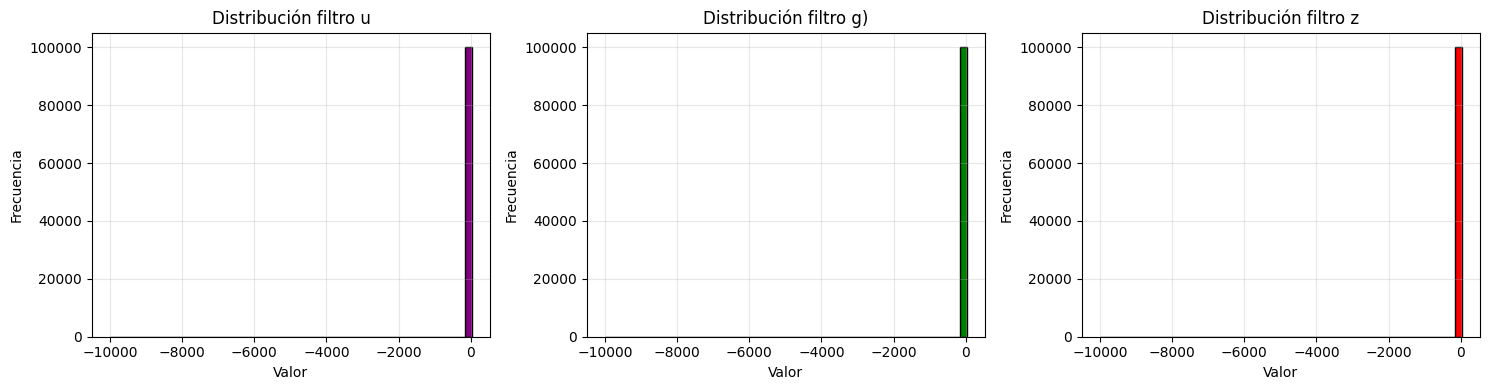

In [165]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

df['u'].hist(bins=50, ax=axes[0], color='purple', edgecolor='black')
axes[0].set_title('Distribución filtro u')
axes[0].set_xlabel('Valor')
axes[0].set_ylabel('Frecuencia')
axes[0].grid(True, alpha=0.3)

df['g'].hist(bins=50, ax=axes[1], color='green', edgecolor='black')
axes[1].set_title('Distribución filtro g)')
axes[1].set_xlabel('Valor')
axes[1].set_ylabel('Frecuencia')
axes[1].grid(True, alpha=0.3)

df['z'].hist(bins=50, ax=axes[2], color='red', edgecolor='black')
axes[2].set_title('Distribución filtro z')
axes[2].set_xlabel('Valor')
axes[2].set_ylabel('Frecuencia')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

- Efectivamente la distribucion esta sesgada, existe algun outlier, que nos esta distorsionando la variable, debe ser de un valor negativo, ya que nuestra visualizacion "se arastra" demasiado al negativo tal como nuestro analisis de sesgo.

In [166]:
print("Filtro u - Min:", df['u'].min(), "Max:", df['u'].max(), "Moda:", df['u'].mode()[0])
print("Filtro g - Min:", df['g'].min(), "Max:", df['g'].max(), "Moda:", df['g'].mode()[0])
print("Filtro z - Min:", df['z'].min(), "Max:", df['z'].max(), "Moda:", df['z'].mode()[0])

Filtro u - Min: -9999.0 Max: 32.78139 Moda: 24.63465
Filtro g - Min: -9999.0 Max: 31.60224 Moda: 25.11438
Filtro z - Min: -9999.0 Max: 29.38374 Moda: 22.8269


- Viendo, valoes como el minimo, maximo y la moda(que en este caso puede ser util), vemos que el minimo es un valor extremo.

In [167]:
print("Valores (-9999) en filtros fotométricos:")
print(f"Filtro u: {(df['u'] == -9999).sum()}")
print(f"Filtro g: {(df['g'] == -9999).sum()}")
print(f"Filtro z: {(df['z'] == -9999).sum()}")

Valores (-9999) en filtros fotométricos:
Filtro u: 1
Filtro g: 1
Filtro z: 1


- Podemos ver que este valor seguramente se trata de algun error, ya que solamente sucede una vez, puede que en la misma fila

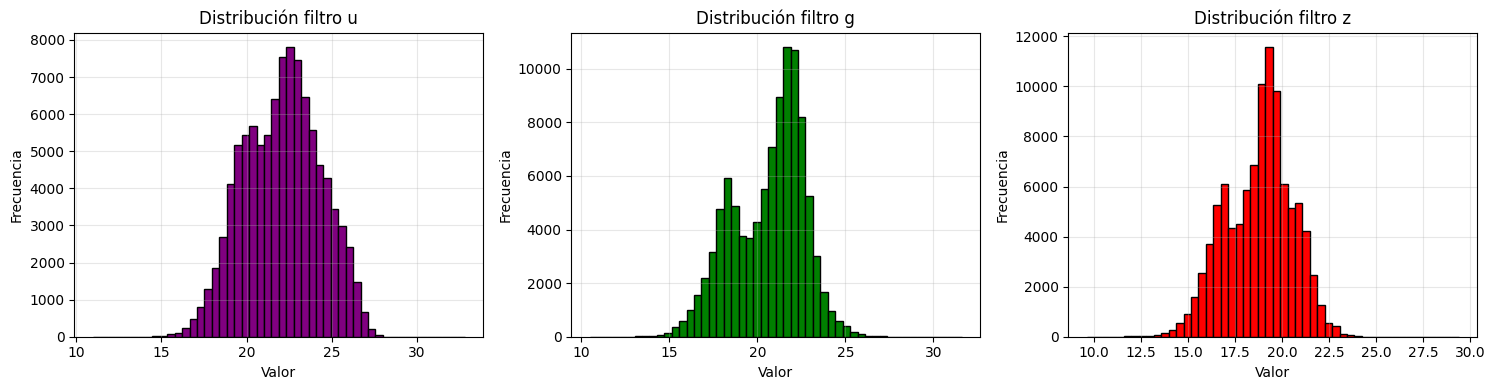

In [168]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

df[df['u'] > -100]['u'].hist(bins=50, ax=axes[0], color='purple', edgecolor='black')
axes[0].set_title('Distribución filtro u')
axes[0].set_xlabel('Valor')
axes[0].set_ylabel('Frecuencia')
axes[0].grid(True, alpha=0.3)

df[df['g'] > -100]['g'].hist(bins=50, ax=axes[1], color='green', edgecolor='black')
axes[1].set_title('Distribución filtro g')
axes[1].set_xlabel('Valor')
axes[1].set_ylabel('Frecuencia')
axes[1].grid(True, alpha=0.3)

df[df['z'] > -100]['z'].hist(bins=50, ax=axes[2], color='red', edgecolor='black')
axes[2].set_title('Distribución filtro z')
axes[2].set_xlabel('Valor')
axes[2].set_ylabel('Frecuencia')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

- Ahora que filtramos el valor, se ven "normales", tendremos que eliminar filas con ese valor despues.

Analisis de Outliers:


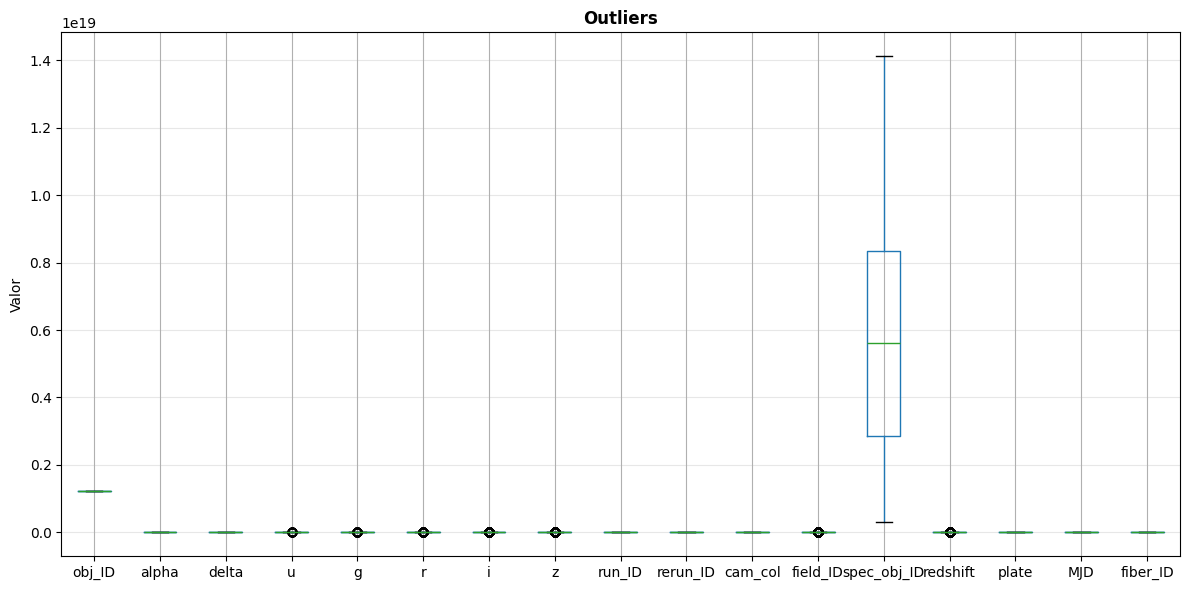

In [169]:
print("Analisis de Outliers:")

df.boxplot(figsize=(12, 6))
plt.title('Outliers', fontsize=12, fontweight='bold')
plt.ylabel('Valor')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


- Todos los valores estan "normalizados" alrededor de 0, lo cual tiene sentido para un dataset astronomico, unicamente destacan obj_ID y spec_obj_ID, los cual tenemos que eliminar ya que se tratan de etiquetas


Gráficos de distribución para cada columna


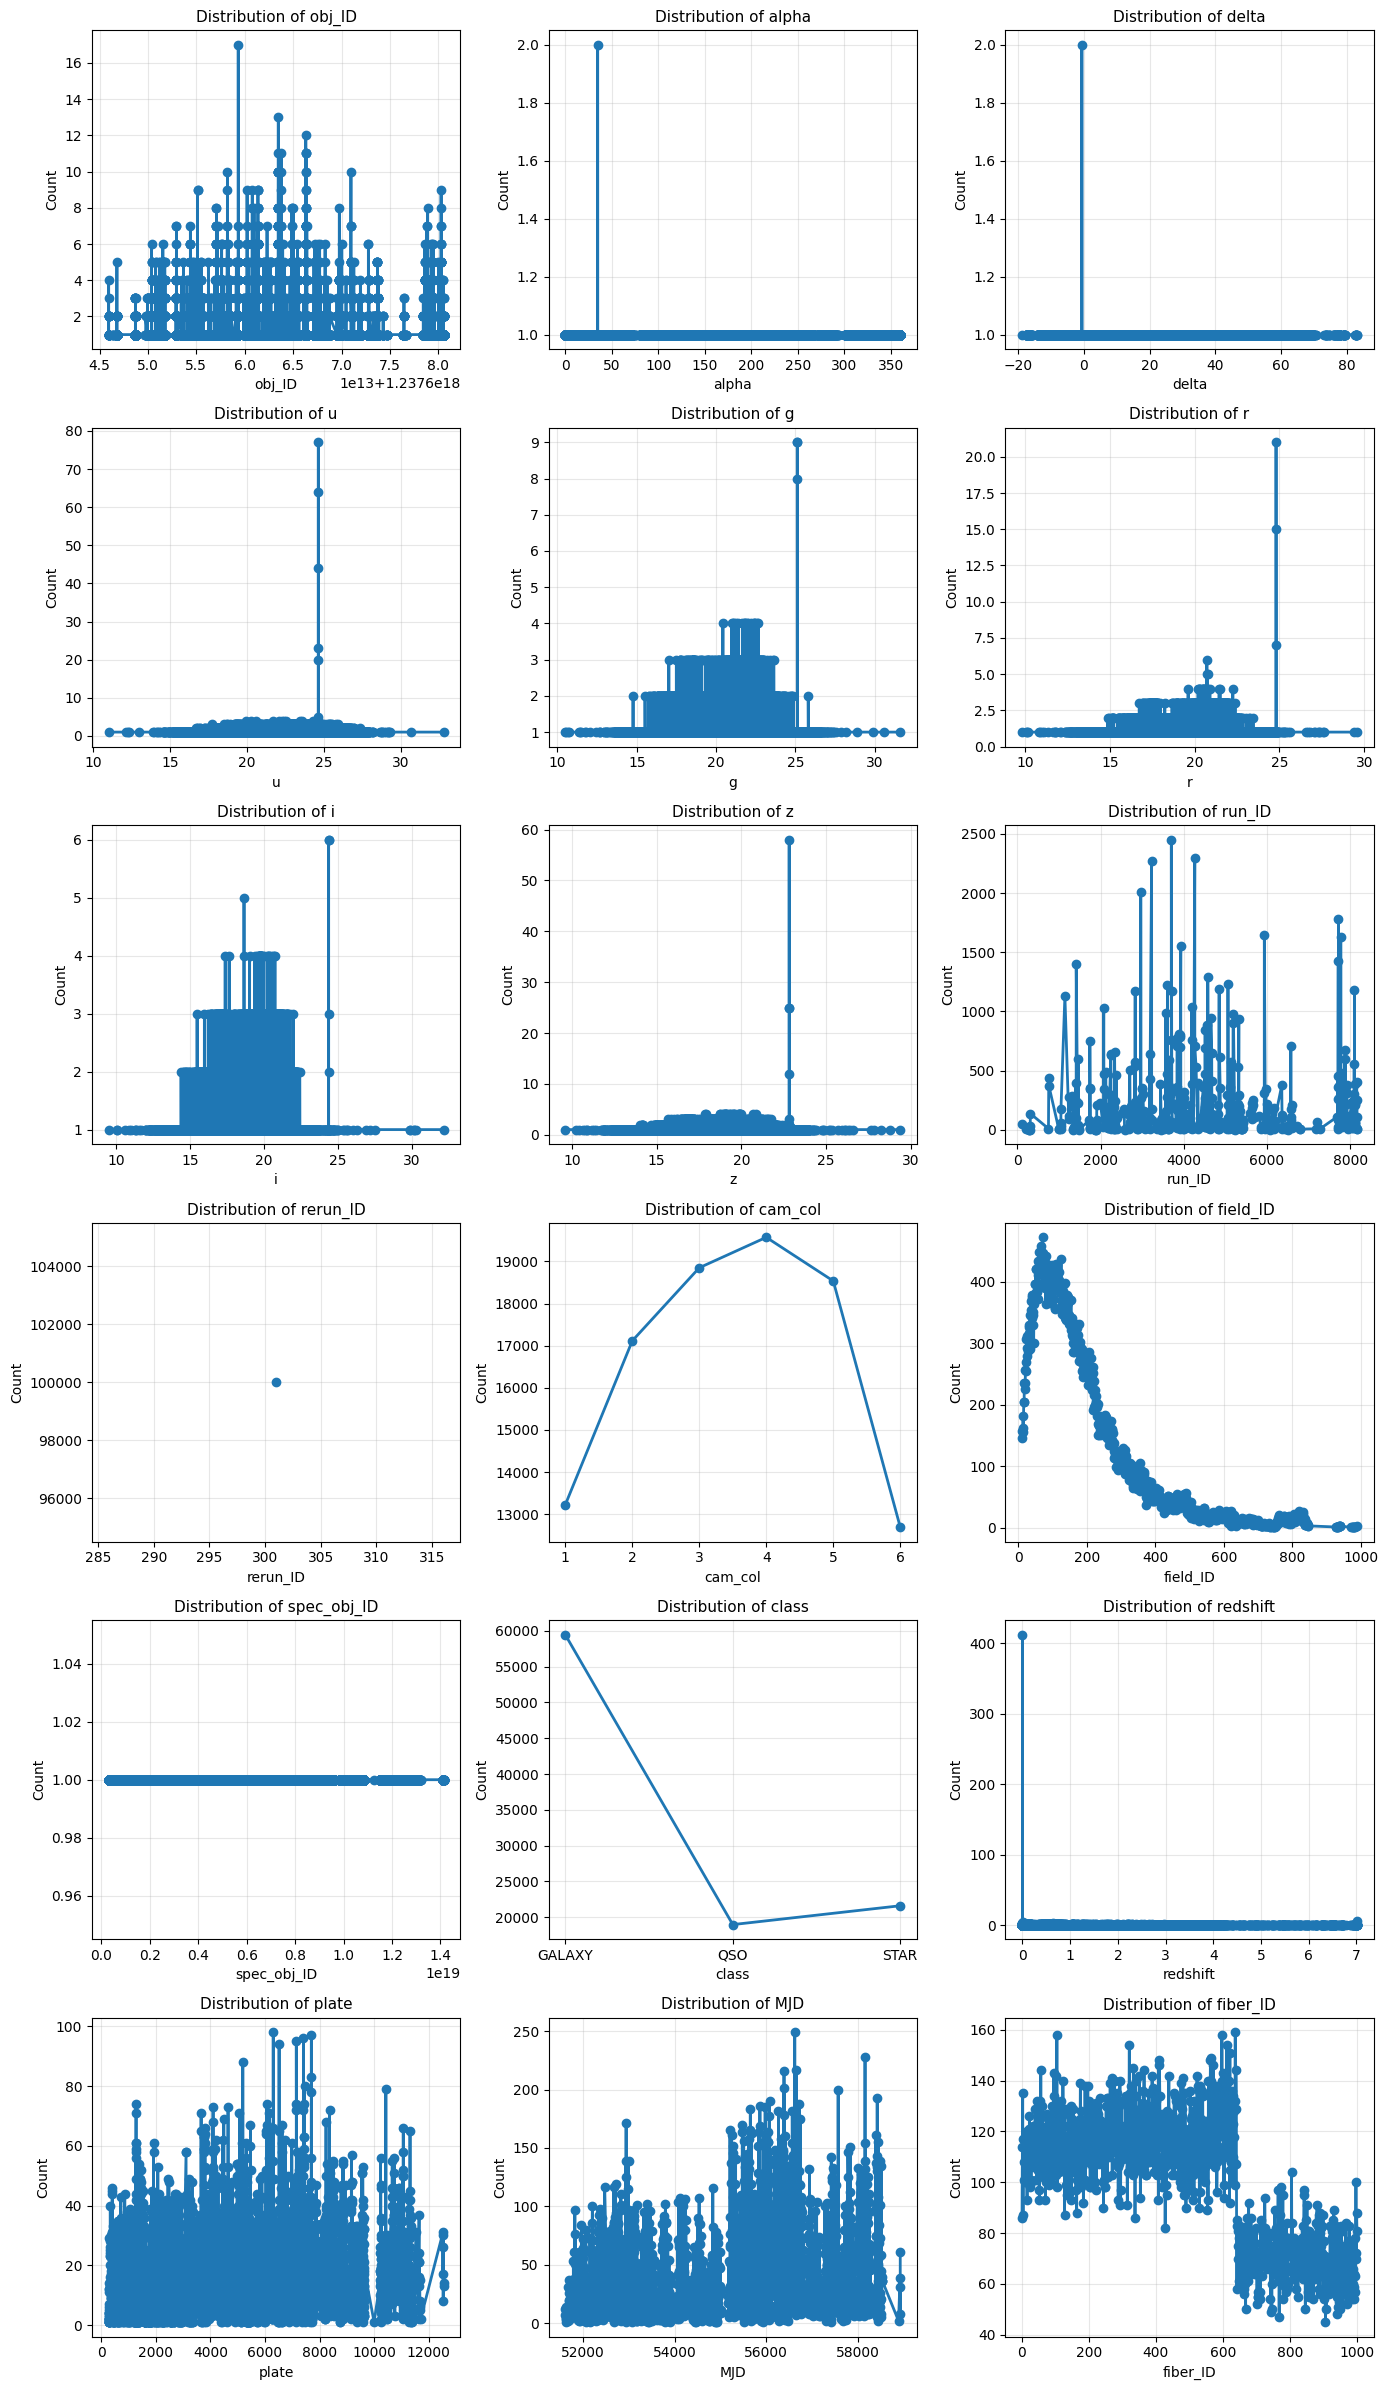

In [170]:
print("\nGráficos de distribución para cada columna")
n_cols = 3
n_rows = (len(df.columns) + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, 4 * n_rows))
axes = axes.flatten()

for idx, column_name in enumerate(df.columns):
    if column_name in ['u', 'g', 'z']:
        data_filtered = df[df[column_name] != -9999][column_name]
        value_counts = data_filtered.value_counts().sort_index()
    else:
        value_counts = df[column_name].value_counts().sort_index()
    
    axes[idx].plot(value_counts.index, value_counts.values, marker='o', linestyle='-', linewidth=2)
    axes[idx].set_xlabel(column_name, fontsize=10)
    axes[idx].set_ylabel('Count', fontsize=10)
    axes[idx].set_title(f'Distribution of {column_name}', fontsize=11)
    axes[idx].grid(True, alpha=0.3)

# Hide unused subplots
for idx in range(len(df.columns), len(axes)):
    axes[idx].set_visible(False)

plt.tight_layout()
plt.show()

- Podemos ver que redshift, nuestra variable objetivo tiene un valor que se repite mucho alrededor de 0, es necesario analizar esto.
- Podemos Observar aqui que las siguientes variables las podemos descartar
    - *rerun_id*: No tiene ninguna varianza.
    - *spec_obj_id*: Se trata de un ID

In [171]:
print("Análisis de redshift:")
print(f"Redshift - Min: {df['redshift'].min()}")
print(f"Redshift - Max: {df['redshift'].max()}")
print(f"Moda: {df['redshift'].mode()[0]}")
print(f"Media: {df['redshift'].mean():.4f}")
print(f"Mediana: {df['redshift'].median():.4f}")
print(f"Valores únicos: {df['redshift'].nunique()}")

print(f"\nValores de redshift == 0: {(df['redshift'] == 0).sum()}")
print(f"Porcentaje de redshift == 0: {(df['redshift'] == 0).sum() / len(df) * 100:.2f}%")

print("\nDistribución de 'class' para redshift == 0:")
print(df[df['redshift'] == 0]['class'].value_counts())

Análisis de redshift:
Redshift - Min: -0.009970667
Redshift - Max: 7.011245
Moda: 0.0
Media: 0.5767
Mediana: 0.4242
Valores únicos: 99295

Valores de redshift == 0: 412
Porcentaje de redshift == 0: 0.41%

Distribución de 'class' para redshift == 0:
class
GALAXY    412
Name: count, dtype: int64


- Podemos ver que 0 se repite 412 veces, investigue en internet y descubri que 0 en redshift significan objetos cercanos, por lo que esas 412 galaxias son aquellas que son relativamente cercanas y estaticas

- Aquellas que son menor a 0 son "blueshift", aquellas galaxias o objetos que se estan acercando a la tierra, como en el caso de Andromeda

- Me entro curiosidad para ver cual es el redshift de las estrellas porque ninguna en 0 es una estrella, mi hipotesis es que todas las estrellas tienene un redshift debajo de 0, 

In [172]:
print("Análisis de Estrellas:")
stars = df[df['class'] == 'STAR']

stars_above_0 = stars[stars['redshift'] > 0]

print(f"Total de estrellas en el dataset: {len(stars)}")
print(f"Estrellas con redshift > 0: {len(stars_above_0)}")
print(f"Porcentaje de estrellas con redshift > 0: {(len(stars_above_0) / len(stars)) * 100:.2f}%")

print(f"\nEstrellas con redshift == 0: {len(stars[stars['redshift'] == 0])}")
print(f"Estrellas con redshift < 0: {len(stars[stars['redshift'] < 0])}")

print(f"\nEstadísticas de redshift para estrellas con redshift > 0:")
print(f"  - Mínimo: {stars_above_0['redshift'].min():.6f}")
print(f"  - Máximo: {stars_above_0['redshift'].max():.6f}")
print(f"  - Media: {stars_above_0['redshift'].mean():.6f}")
print(f"  - Mediana: {stars_above_0['redshift'].median():.6f}")

Análisis de Estrellas:
Total de estrellas en el dataset: 21594
Estrellas con redshift > 0: 7912
Porcentaje de estrellas con redshift > 0: 36.64%

Estrellas con redshift == 0: 0
Estrellas con redshift < 0: 13682

Estadísticas de redshift para estrellas con redshift > 0:
  - Mínimo: 0.000000
  - Máximo: 0.004153
  - Media: 0.000250
  - Mediana: 0.000134


- Podemos observar que no, que mas de un cuarto estan mas alla de 0, pero el valor maximo es de 0.004153, que significa una estrella que se esta alejando velozmente de nosotros, pero en la escala cosmologica es extremadamente lenta, es por esto que a las estrellas no les afecta la expansion del universo, segun la mediana (0.000134, la mayoria de estrellas se mueven lentamente.

- Algo interesante es que que las estrellas en el dataset son solo aquellas en la via lactea, sin contar las de otras galaxias.

### 1.3 Limpieza de Datos

##### 1.3.1 Decisiones de Limpieza

Basado en el análisis exploratorio, procederemos a limpiar el dataset:

1. **Valores extremos en filtros (-9999)**: En los filtros u, g, z (son mediciones invalidad)
2. **Columnas ID sin valor predictivo**: obj_ID, spec_obj_ID, run_ID, field_ID, plate, fiber_ID, MJD
3. **Columnas técnicas sin varianza**: rerun_ID (solo tiene 1 valor único), cam_col (información técnica de la cámara)
4. **Hacer "encoding" variable categórica**: Transformar 'class' a valores numéricos

In [173]:
print("Dataset original:")
print(f"Filas: {df.shape[0]}, Columnas: {df.shape[1]}")
print(f"Columnas: {list(df.columns)}")

Dataset original:
Filas: 100000, Columnas: 18
Columnas: ['obj_ID', 'alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'run_ID', 'rerun_ID', 'cam_col', 'field_ID', 'spec_obj_ID', 'class', 'redshift', 'plate', 'MJD', 'fiber_ID']


In [174]:

df_clean = df[(df['u'] != -9999) & (df['g'] != -9999) & (df['z'] != -9999)]

print(f"Filas eliminadas: {len(df) - len(df_clean)}")
print(f"Filas restantes: {len(df_clean)}")

Filas eliminadas: 1
Filas restantes: 99999


In [175]:
columns_to_drop = ['obj_ID', 'spec_obj_ID', 'run_ID', 'rerun_ID', 'cam_col', 'field_ID', 'plate', 'MJD', 'fiber_ID']

df_clean = df_clean.drop(columns=columns_to_drop)

print(f"Columnas eliminadas: {len(columns_to_drop)}")
print(f"Columnas restantes: {df_clean.shape[1]}")
print(f"Columnas: {list(df_clean.columns)}")

Columnas eliminadas: 9
Columnas restantes: 9
Columnas: ['alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'class', 'redshift']


In [176]:
print("Valores únicos antes de codificar:")
print(df_clean['class'].value_counts())

# GALAXY=0, STAR=1, QSO(Quazar)=2
class_mapping = {'GALAXY': 0, 'STAR': 1, 'QSO': 2}
df_clean['class'] = df_clean['class'].map(class_mapping)

print("\nValores después de codificar:")
print(df_clean['class'].value_counts().sort_index())

Valores únicos antes de codificar:
class
GALAXY    59445
STAR      21593
QSO       18961
Name: count, dtype: int64

Valores después de codificar:
class
0    59445
1    21593
2    18961
Name: count, dtype: int64


In [177]:
print("Datos después de la limpieza:")

print(f"\nDataset original:")
print(f"  - Filas: {df.shape[0]}")
print(f"  - Columnas: {df.shape[1]}")

print(f"\nDataset limpio :")
print(f"  - Filas: {df_clean.shape[0]}")
print(f"  - Columnas: {df_clean.shape[1]}")

print(f"\nColumnas finales:")
print(df_clean.dtypes)

Datos después de la limpieza:

Dataset original:
  - Filas: 100000
  - Columnas: 18

Dataset limpio :
  - Filas: 99999
  - Columnas: 9

Columnas finales:
alpha       float64
delta       float64
u           float64
g           float64
r           float64
i           float64
z           float64
class         int64
redshift    float64
dtype: object


##### 1.3.2 Explicación de Decisiones Tomadas

1. **celdas con valor -99999:**
   - Representa mediciones inválidas
   - Solo 1 fila de 100,000
   - Distorciona la varianza

2. **columnas de ID:**
   - obj_ID, spec_obj_ID, run_ID, field_ID, plate, fiber_ID, MJD son solo identificadores o metadatos técnicos
   - Incluirlas causaría overfitting

3. **rerun_ID y cam_col:**
   - rerun_ID: Solo tiene 1 valor único 
   - cam_col: Información técnica de la cámara sin relación física con redshift

4. **encoding para 'class':**
   - Los modelos de regresión requieren entrada numérica
   - GALAXY=0, STAR=1, QSO=2 
   - El tipo de objeto astronómico puede tener relación con su redshift

5. **¿Por qué mantener redshift = 0 y redshift < 0?**
   - Son valores físicamente válidos (objetos cercanos o en blueshift)
   - Representan mediciones reales
   - Proporcionan información valiosa sobre el rango completo de distancias

### 1.4 Análisis de Relaciones entre Variables

#### 1.4.1 Matriz de Correlación

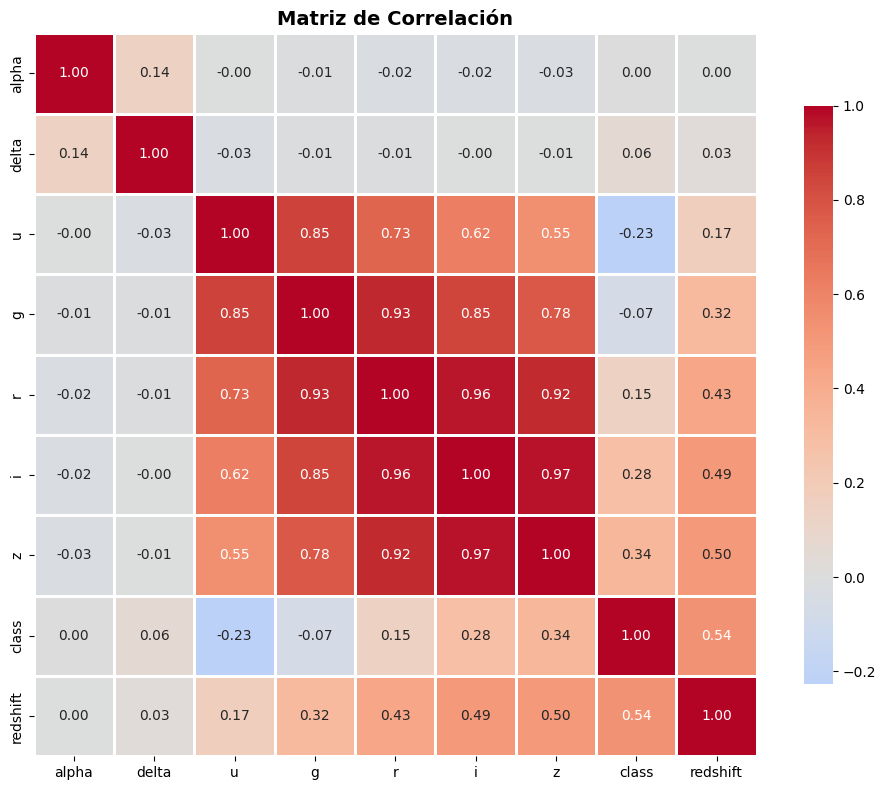

Correlación con redshift (variable objetivo):
redshift    1.000000
class       0.536829
z           0.501060
i           0.492381
r           0.433237
g           0.318910
u           0.166816
delta       0.031629
alpha       0.001671
Name: redshift, dtype: float64


In [178]:

correlation = df_clean.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, fmt='.2f', cmap='coolwarm', center=0, 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Matriz de Correlación', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("Correlación con redshift (variable objetivo):")
print(correlation['redshift'].sort_values(ascending=False))

- Podemos observar que la clase (estrella, quazar o galaxia) es la variable con mas relacion al redshift, de la misma manera los filtros son buenos predictores como esperados, mientras que los angulos "delta" y "alpha" lo son menos.

#### 1.4.2 Relación entre Filtros Fotométricos y Redshift

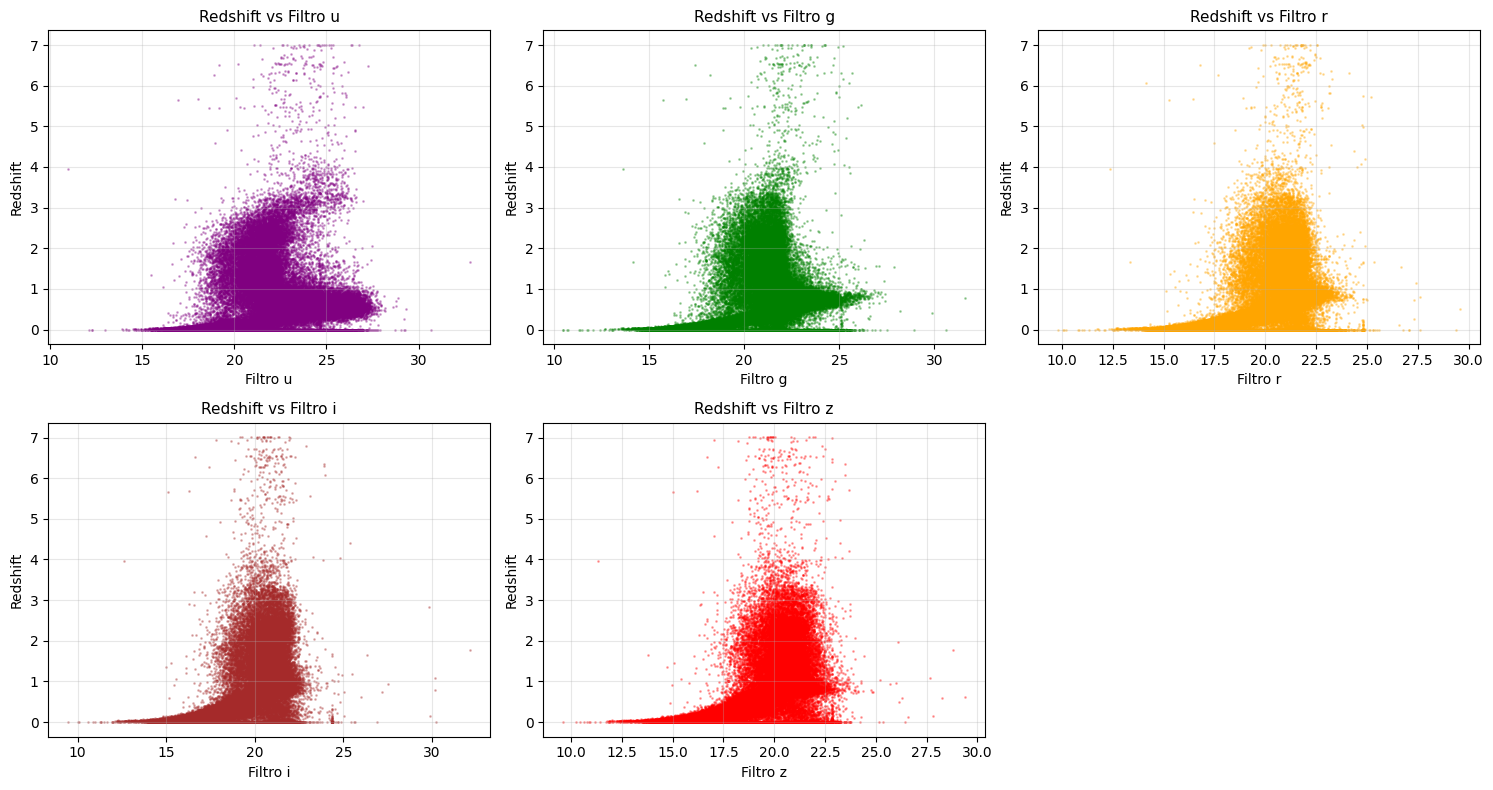

In [179]:
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
axes = axes.flatten()

filters = ['u', 'g', 'r', 'i', 'z']
colors = ['purple', 'green', 'orange', 'brown', 'red']

for idx, (filter_name, color) in enumerate(zip(filters, colors)):
    axes[idx].scatter(df_clean[filter_name], df_clean['redshift'], 
                     alpha=0.3, s=1, c=color)
    axes[idx].set_xlabel(f'Filtro {filter_name}', fontsize=10)
    axes[idx].set_ylabel('Redshift', fontsize=10)
    axes[idx].set_title(f'Redshift vs Filtro {filter_name}', fontsize=11)
    axes[idx].grid(True, alpha=0.3)

axes[5].set_visible(False)

plt.tight_layout()
plt.show()

- Podemos observar una clara relacion entre redshift y los filtros, ya que se forma una "linea" vertical, tiene sentido porque cada filtro captura una diferente longitud de onda de luz, lo cual está directamente relacionado con el redshift.

#### 1.4.3 Distribución de Redshift por Tipo de Objeto Astronómico

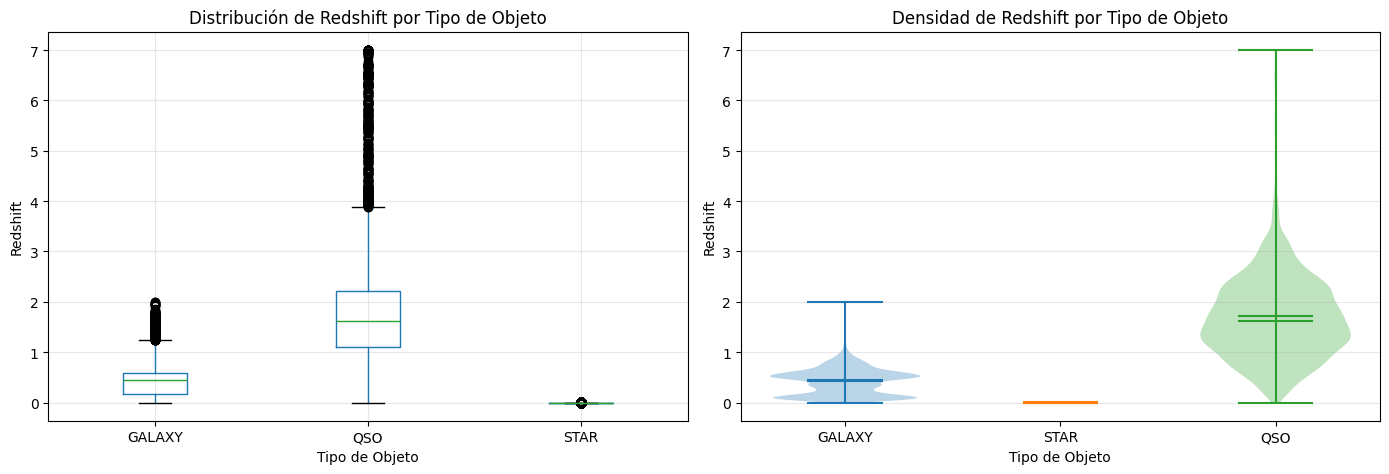

In [180]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

class_labels = {0: 'GALAXY', 1: 'STAR', 2: 'QSO'}
df_clean['class_name'] = df_clean['class'].map(class_labels)

df_clean.boxplot(column='redshift', by='class_name', ax=axes[0])
axes[0].set_title('Distribución de Redshift por Tipo de Objeto')
axes[0].set_xlabel('Tipo de Objeto')
axes[0].set_ylabel('Redshift')
axes[0].get_figure().suptitle('')  # Quitar título automático
axes[0].grid(True, alpha=0.3)

for idx, (class_val, class_name) in enumerate(class_labels.items()):
    data = df_clean[df_clean['class'] == class_val]['redshift']
    parts = axes[1].violinplot([data], positions=[idx], widths=0.7, showmeans=True, showmedians=True)
    
axes[1].set_xticks([0, 1, 2])
axes[1].set_xticklabels(['GALAXY', 'STAR', 'QSO'])
axes[1].set_xlabel('Tipo de Objeto')
axes[1].set_ylabel('Redshift')
axes[1].set_title('Densidad de Redshift por Tipo de Objeto')
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

df_clean = df_clean.drop('class_name', axis=1)

**Observaciones**

- **GALAXY (Galaxias)**: Tienen redshift variados, desde cercanas hasta lejanas
- **STAR (Estrellas)**: Tienden a tener un redshift bajo debido a que se encuentran en nuestra propia galaxia
- **QSO (Quásares)**: Tienden a tener redshift más alto, ya que son objetos muy distantes y antiguos

En conclusión, la clase es una de las mejores predictoras del redshift.

#### 1.4.4 Distribución de Variables Predictoras

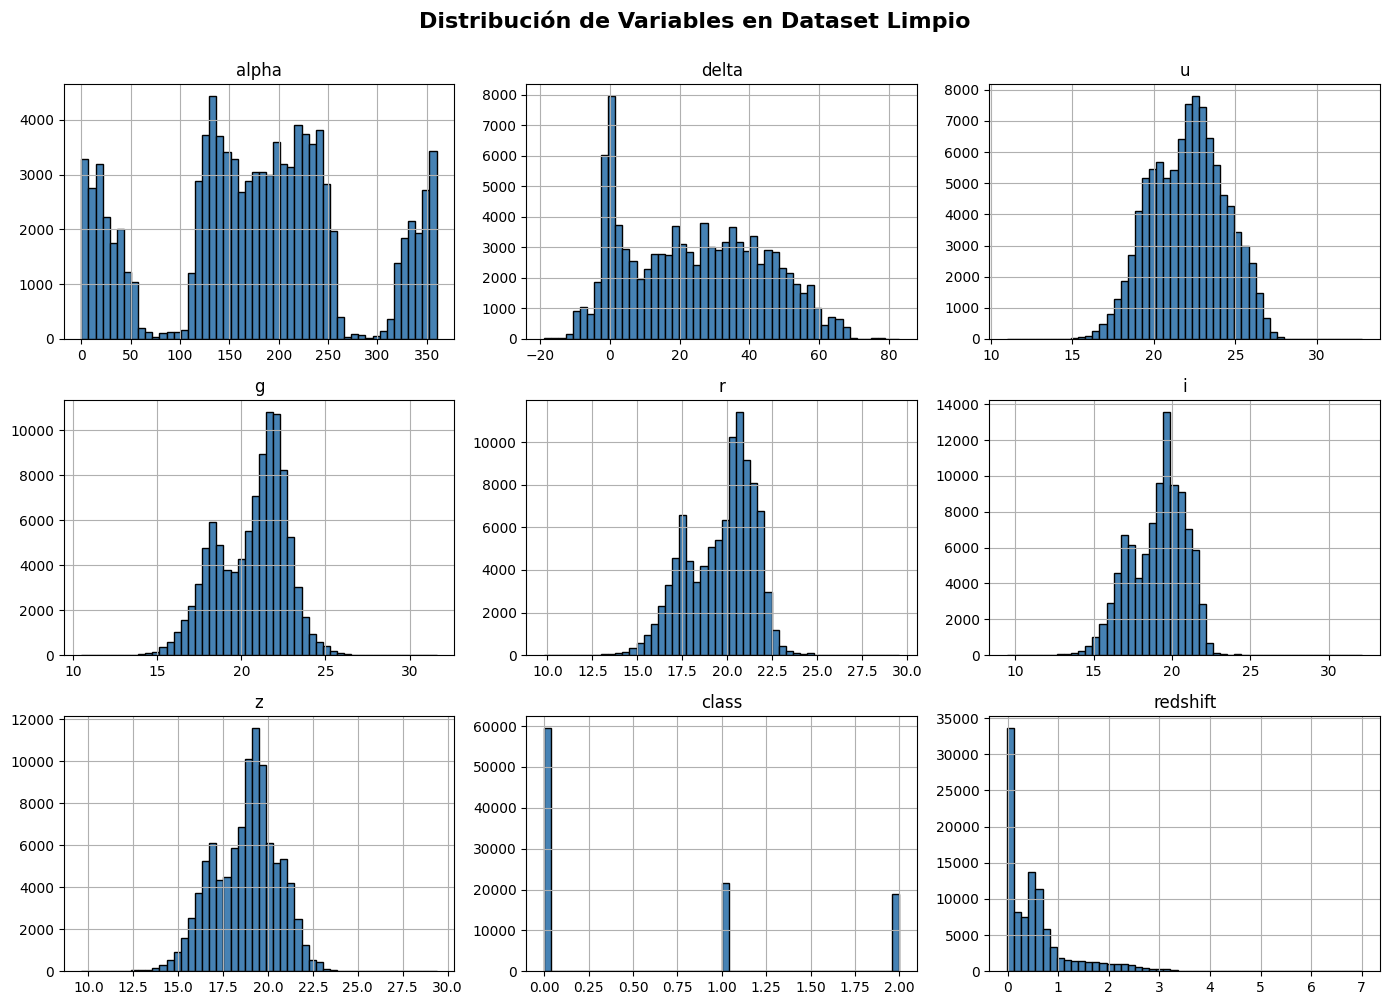

In [181]:

df_clean.hist(bins=50, figsize=(14, 10), edgecolor='black', color='steelblue')
plt.suptitle('Distribución de Variables en Dataset Limpio', fontsize=16, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

**Observaciones sobre las Distribuciones**

- **Filtros fotométricos (u, g, r, i, z)**: Después de eliminar el valor anormal, las distribuciones son normales y apropiadas para la regresion.
- **Alpha y delta**: Representan coordenadas celestes, delta tiene una distribucion normal, mientras que alpha una multimodal, la verdad esto no es muy importante, porque solo significa que la camara capturo el cielo en "batches" y zonas especificas.
- **Redshift**: Tiene un alto sesgo positivo, lo cual es bueno, ya que la mayoria de cuerpos son cercanos no lejanos.
- **Class**: Variable categórica codificada (0=GALAXY, 1=STAR, 2=QSO)

### 1.5 Division de Datos

In [182]:
X = df_clean.drop('redshift', axis=1)
y = df_clean['redshift']

print("Dimensiones antes de la división:")
print(f"X: {X.shape}")
print(f"y: {y.shape}")

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("\nDimensiones después de la división:")
print(f"X_train: {X_train.shape}")
print(f"X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}")
print(f"y_test: {y_test.shape}")

print(f"\nPorcentaje de datos de entrenamiento: {len(X_train)/len(X)*100:.2f}%")
print(f"Porcentaje de datos de prueba: {len(X_test)/len(X)*100:.2f}%")

Dimensiones antes de la división:
X: (99999, 8)
y: (99999,)

Dimensiones después de la división:
X_train: (79999, 8)
X_test: (20000, 8)
y_train: (79999,)
y_test: (20000,)

Porcentaje de datos de entrenamiento: 80.00%
Porcentaje de datos de prueba: 20.00%


**Explicación de la División:**
- Utilizamos una división 80-20, que es estándar para datasets de este tamaño
- El conjunto de entrenamiento se usará para entrenar los modelos
- El conjunto de prueba se usará solo para evaluar el rendimiento final

### 1.6 Escalado de Datos

Estadísticas antes del escalado (datos de entrenamiento):
       alpha  delta      u      g      r      i      z  class
mean  177.48  24.15  22.08  20.63  19.65  19.08  18.77   0.60
std    96.44  19.66   2.25   2.04   1.86   1.76   1.77   0.79

Estadísticas después del escalado (datos de entrenamiento):
      alpha  delta    u    g    r    i    z  class
mean   -0.0    0.0  0.0 -0.0  0.0  0.0 -0.0   -0.0
std     1.0    1.0  1.0  1.0  1.0  1.0  1.0    1.0


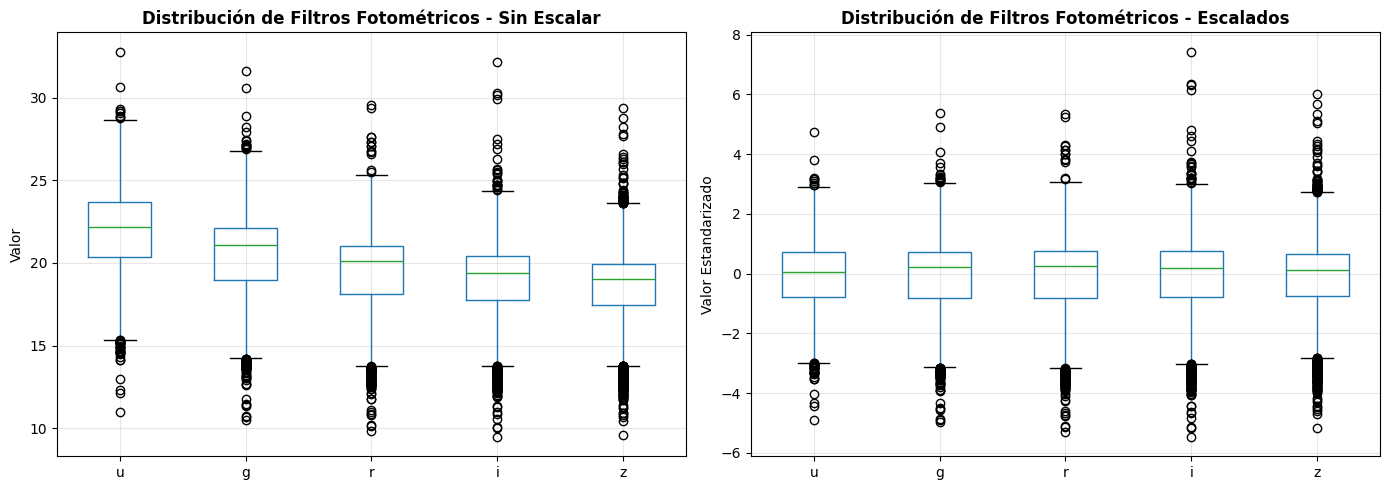

In [ ]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

print("Estadísticas antes del escalado (datos de entrenamiento):")
print(X_train.describe().loc[['mean', 'std']].round(2))

print("\nEstadísticas después del escalado (datos de entrenamiento):")
print(X_train_scaled.describe().loc[['mean', 'std']].round(2))

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

X_train[['u', 'g', 'r', 'i', 'z']].boxplot(ax=axes[0])
axes[0].set_title('Distribución de Filtros Fotométricos - Sin Escalar', fontweight='bold')
axes[0].set_ylabel('Valor')
axes[0].grid(True, alpha=0.3)

X_train_scaled[['u', 'g', 'r', 'i', 'z']].boxplot(ax=axes[1])
axes[1].set_title('Distribución de Filtros Fotométricos - Escalados', fontweight='bold')
axes[1].set_ylabel('Valor Estandarizado')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

**¿Por qué es necesario el escalado?**

1. **Diferentes escalas**: Las variables tienen rangos muy diferentes 
2. **Mejora el rendimiento**: Muchos algoritmos son sensibles a la escala de las variables

#### Yo eligiria Random Forest, pero...

No es un modelo perfecto, es el "default" porque los filtros tienen alta multicolinearidad y tenemos una variable categorica, que en modelos como Ridge y Lasso podrian confundir al modelo por no tener una relacion lineal.

El problema es que no es ideal, porque tiene muy baja interpretabilidad, y para la ciencia, yo creo que es muy importante la interpretacion.

Lo que se me ocurre es hacer un modelo de regresion lineal simple por filtro en relacion al redshift, y despues de comprender su impacto aplicamos random forest con todas las variables.

#### Clasificación

1 **Visualización, exploración, preparación y análisis de datos:** 
- Extracción de información estadística básica en los datos analizados.
- En esta fase las características de las bases de datos deben ser mencionadas (datos nulos, datos sesgados, datos atípicos, distribución de datos, datos imbalanceados en la variable de salida, etc.)
- Limpieza de datos
- En esta fase de debe mencionar y mostrar el proceso y decisiones tomadas para procesar y limpiar estos datos. 
- Se deben incluir gráficos interesantes que muestren el comportamiento de los datos y cómo se relacionan, así como acompañar los gráficos con una explicación de lo que se observa en el gráfico.  
- Después de haber hecho el análisis de tus datos, puedes irte dando una idea de cuál modelo es el mejor para tu dataset. 
- Explica dadas las caracterícas que observaste sobre los datos que tienes, cuál sería el mejor modelo a aplicar en tu dataset. 
 

### Entrega 2 (Modelado):

En esta fase se debe entregar lo que se hizo en la entrega 1 con sus respectivas correcciones más los siguientes puntos:

#### Regresión 

2.1. **Procesar modelo de regresión:** 
- Una vez sugerido un modelo que se puede aplicar a tu dataset, se pide que compares al menos 4 modelos de regresión para estimar predicciones en tus datos y los compares utilizando métricas de performance. 
- La intención principal es hacer una comparación del performance de cada modelo, incluyendo la mención de la complejidad (número de parámetros y tiempo de ejecución).
- Se pide añadir un método de ajuste de hiperparámetros para mejorar el performance del modelo. 
- Se pide justificar cuál métrica de performance es la mejor para utilizar en tu dataset (MSE, MAE, R2) (puedes utilizar varias si es que así lo crees necesario). 
- Una vez comparados los 4 modelos y elegido el mejor modelo dadas las métricas de performance, compara si tu respuesta inicial sobre cuál modelo era el mejor para tus datos es igual al resultado de comparar los 4 modelos.
- Observa si tu modelo está haciendo overfitting o underfitting
- Crear un conjunto de datos "nuevos" donde se prediga la variable objetivo para esos nuevos datos utilizando el mejor modelo que obtuviste. 

2.2. **Discusión de los resultados:** 
- Basado en los resultados de la comparación y performance de los modelos, generar una sección de conclusiones donde se hable de las ventajas y desventajas de los modelos propuestos. 
- Explica qué variables fueron las más importantes en tu modelo y qué relaciones interesantes viste sobre tus datos. 


#### Clasificación

2.3. **Procesar modelo de regresión:** 
- Una vez sugerido un modelo que se puede aplicar a tu dataset, se pide que compares al menos 4 modelos de clasificación para estimar predicciones en tus datos y los compares utilizando métricas de performance. 
- La intención principal es hacer una comparación del performance de cada modelo, incluyendo la mención de la complejidad (número de parámetros y tiempo de ejecución).
- Se pide añadir un método de ajuste de hiperparámetros para mejorar el performance del modelo. 
- Se pide justificar cuál métrica de performance es la mejor para utilizar en tu dataset (precision, recall, accuracy, f1 score, etc.) (puedes utilizar varias si es que así lo crees necesario). 
- Una vez comparados los 4 modelos y elegido el mejor modelo dadas las métricas de performance, compara si tu respuesta inicial sobre cuál modelo era el mejor para tus datos es igual al resultado de comparar los 4 modelos.
- - Observa si tu modelo está haciendo overfitting o underfitting 
- Crear un conjunto de datos "nuevos" donde se prediga la variable objetivo para esos nuevos datos utilizando el mejor modelo que obtuviste. 

2.4. **Discusión de los resultados:** 
- Basado en los resultados de la comparación y performance de los modelos, generar una sección de conclusiones donde se hable de las ventajas y desventajas de los modelos propuestos. 
- Explica qué variables fueron las más importantes en tu modelo y qué relaciones interesantes viste sobre tus datos. 

### Entrega 3 (Presentación final)

 - Imagina que le estás presentando tu proyecto a tu jefe (tu jefe no es una persona muy técnica que sepa mucho de código) 
 - Sabiendo esto, en esta entrega se pide hacer una presentación en video donde hables sobre todo lo interesante que viste en tu proyecto, trata de hacer la presentación lo más entendible posible para que tu jefe comprenda todo lo que tuviste que hacer desde un inicio así como los resultados. (No puedes mostrar código, tiene que ser visual y mostrar resultados). 
 - En esta fase se pide entregar las correcciones sugeridas de las dos entregas pasadas. 


### Calificación

La calificación de cada fase del proyecto incluido en el reporte final es la siguiente:

| Fase | Puntuación | Características Generales |
| --- | --- | --- |
| Definición del problema | 15% | 1. Mencionar el origen de los datos <br /> 2.Dar contexto de los datos (significado de las variables si es posible) <br /> 3. Describir de qué se trata el problema a resolver|
| Preparación de datos | 30% | 1. Incluya **gráficos** y métricas utilizadas para describir la base de datos. <br /> 1. Describir el tratamiento de variables que requieren transformación o modificación de valores. |
| Procesar modelo de regresión/clasificación | 40% | 1. Describir el modelo aplicado. <br /> 2. Evaluar el desempeño de cada modelo utilizando métricas comunes para poder realizar la comparación. <br /> 3. Pruebe los modelos utilizando datasets en común para que la comparación sea válida 4. Aplicación del modelo para predecir datos nuevos|
| Discusión de los resultados | 15% | 1. Resalte sus observaciones validadas por las métricas que se muestran dentro del desarrollo. <br /> 2. Dar conclusión personal de los resultados y el uso o aplicación de los modelos. |

### ¿ Qué debe tener cada entregable?


- El informe del trabajo realizado se entregará digitalmente en un documento elaborado en una computadora (no fotografías de hojas o cuadernos), e incluirá como mínimo:
    - Nombre y apellidos de los alumnos.
    - Es obligatorio que incluyan el código que generaron para realizar la práctica.
    - Es obligatorio que incluyan los archivos que contengan los datos a analizar para cada problema (regresión y clasificación)
